In [18]:
#In this example, support vector classifier is used as for multivariable classification
#https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
from sklearn.metrics import recall_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn.metrics import precision_score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

In [23]:
#load the iris dataset
df = sns.load_dataset('iris') 

print(df.keys())

df.head()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


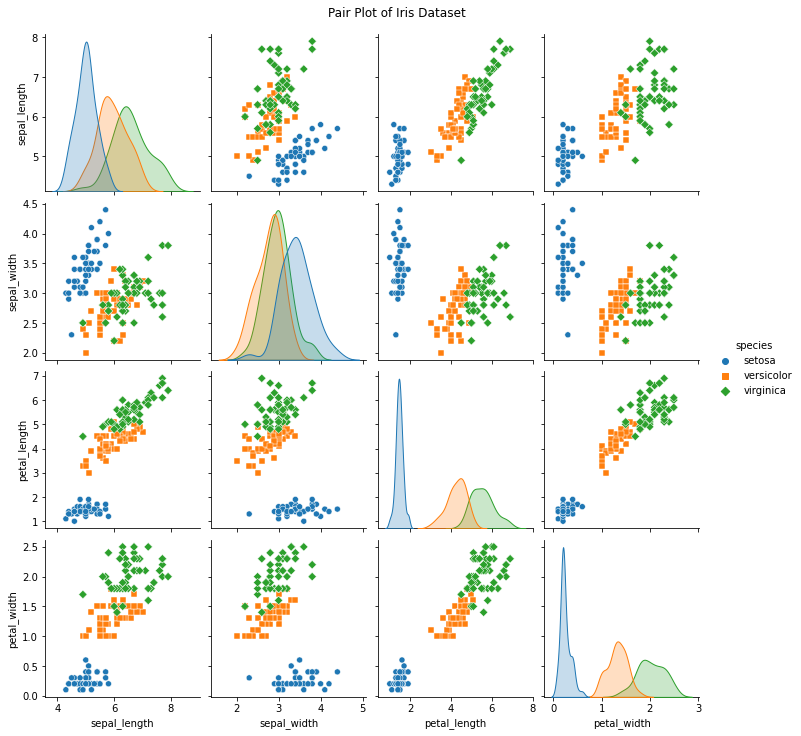

In [25]:
# Create pair plots
sns.pairplot(df, hue='species', markers=['o', 's', 'D'])

# Add a title
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)

# Display the plots
plt.show()

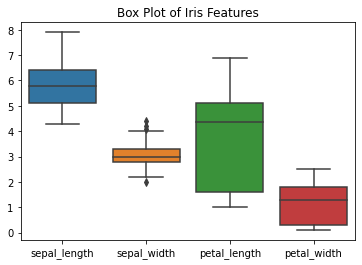

In [26]:
sns.boxplot(data=df)
plt.title("Box Plot of Iris Features")
plt.show()

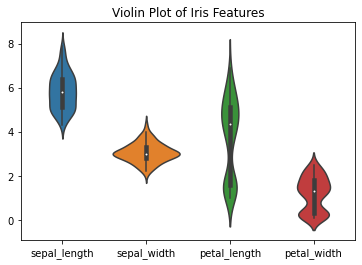

In [27]:
sns.violinplot(data=df)
plt.title("Violin Plot of Iris Features")
plt.show()

/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(

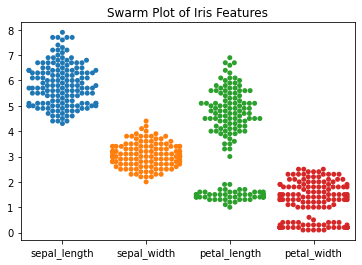

In [28]:
sns.swarmplot(data=df)
plt.title("Swarm Plot of Iris Features")
plt.show()

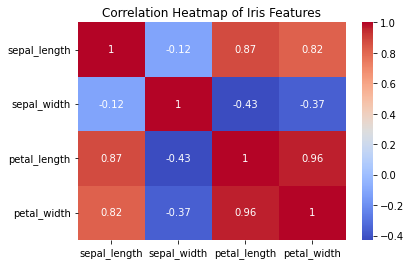

In [29]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Iris Features")
plt.show()

In [30]:
#Species is the output class,to know the count of each class we use value_counts() and see 
#if the dataset is balanced
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [31]:
#Separating independant variable and dependent variable("Species")
X = df.drop(['species'], axis=1)
y = df['species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [32]:
# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [34]:
#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear')

In [35]:
# Perform cross-validation with 10 folds
# 'cv' parameter specifies the number of folds
# 'scoring' parameter specifies the evaluation metric (e.g., 'accuracy')

#aprox runtime: 1 minute

cross_val_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:")
for fold, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: {score:.2f}")

# Calculate and print the average cross-validation score
average_score = cross_val_scores.mean()
print(f"\nAverage Score: {average_score:.2f}")

Cross-Validation Scores:
Fold 1: 1.00
Fold 2: 0.93
Fold 3: 1.00
Fold 4: 1.00
Fold 5: 0.87
Fold 6: 1.00
Fold 7: 0.93
Fold 8: 1.00
Fold 9: 1.00
Fold 10: 1.00

Average Score: 0.97


In [36]:
clf.fit(X_train,y_train)

#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

#calculate recall, precision and F1 score

rec = recall_score(y_test, y_pred, average='weighted')
pres = precision_score(y_test, y_pred, average='weighted')

F1_score = 2/((1/rec) + (1/pres))

print("The weighted recall is: ", rec)
print("The weighted precision is: ", pres)
print("The weighted F1-score is: ", F1_score)

Accuracy: 1.00000
The weighted recall is:  1.0
The weighted precision is:  1.0
The weighted F1-score is:  1.0


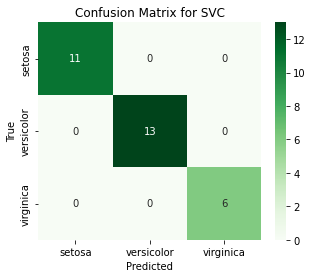

In [37]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

class_labels = df['species'].unique()

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Greens')

# Add a legend
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVC')

# Display the plot
plt.show()